# Using MCMC simulations for a 6 sided dice problem

We have that $p_1 = p_2 = 3p_i$, where $i \in \{3,4,5,6\}$ to model a weighted dice.

Since $\sum_{i=1}^6 p_i = 1$ then $p_1 = p_2 = \frac{3}{10}$, with $p_i = \frac{1}{10}$ for the rest of the sides.

We create a probability vector $\vec{p} = (p_{1,2,\dots,6})$ whose entry numbers correspond to the sides of the dice, and an income vector $\vec{v} =(1,1,-1,-1,-1,-1)$ that codifies the amount of US Dollars gained/lost if the resulting face equals the position of the vector i.e $v_1$ tells us how much money we gain (1 dollar) if the resulting face is 1.

With this, we obtain the expected net gain or loss for this game:

$$\left<Gains\right> = \vec{v} \cdot \vec{p} = \$ 0.20$$

So we should be finding mean values at or near 0.20 dollars for increasingly bigger amount of experiments.



# The work

Using the function weighted_die from the module lets us graph the difference between the experimental value for the mean and the previously calculated value for the mean:

In [ ]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
def prop(d,b):
    if np.random.normal(b,1,100)[0]-b<0:
        return d[int((b)%6)-2]
    else:
        return d[int((b)%6)]

def weighted_die(n):
    probs = np.array([3,3,1,1,1,1])/10
    earnings = np.array([1,1,-1,-1,-1,-1])
    dice = [1,2,3,4,5,6]
    d0 = dice[:]
    rd.shuffle(dice)
    sigma = dice[0]
    samp = []
    for i in range(n+1):
        sigmap = prop(d0,sigma)

        if 1<=sigma<=2 and 1<=sigmap<=2:
            f, fp = 3, 3
        elif 2<sigma and 1<=sigmap<=2:
            f, fp = 1, 3
        elif 2<sigmap and 1<=sigma<=2:
            f, fp = 3, 1
        else:
            f, fp = 1, 1
        alpha = fp/f
        if rd.randrange(100000)/100000 <= alpha:
            samp.append(sigmap)
            sigma = sigmap
        else:
            samp.append(sigma)

    gain = []
    for i in samp:
        if i>2:
            gain.append(-1)
        else:
            gain.append(1)

    return gain


def two_dim_ising(L, temp, n):
    return 0


Y = [np.abs(0.2- np.mean(weighted_die(10**i))) for i in range(1,5)]
X = [i for i in range(1,5)]





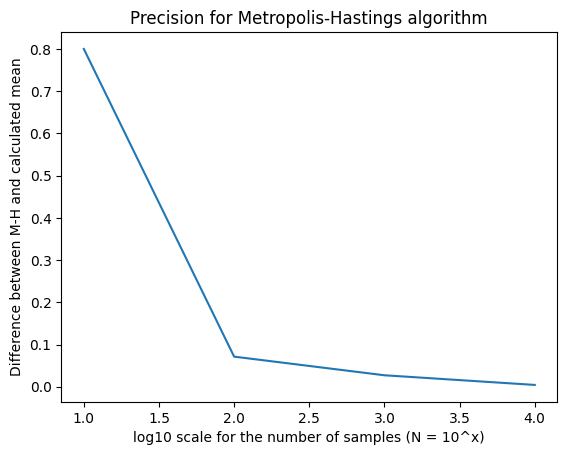

In [ ]:
plt.plot(X,Y)
plt.title("Precision for Metropolis-Hastings algorithm")
plt.xlabel("log10 scale for the number of samples (N = 10^x)")
plt.ylabel("Difference between M-H and calculated mean")
plt.show()

We can observe that starting at $N = 10^2$ tries we get a steep reduction in the difference, indicating that the algorithm utilized can properly obtain means near theoretical estimations and that it seems to converge. We try again for bigger $N$:

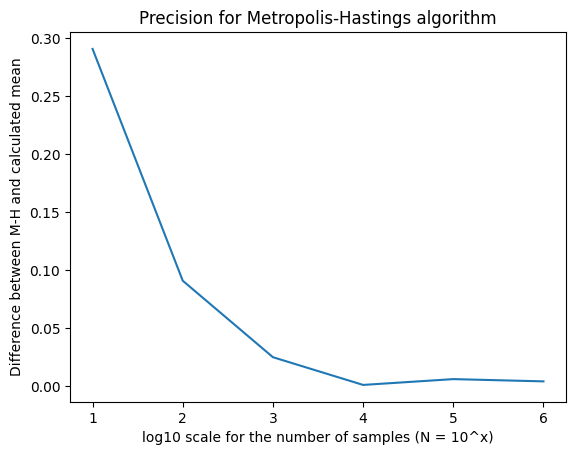

In [ ]:
N = 7
Y = [np.abs(0.2- np.mean(weighted_die(10**i))) for i in range(1,N)]
X = [i for i in range(1,N)]

plt.plot(X,Y)
plt.title("Precision for Metropolis-Hastings algorithm")
plt.xlabel("log10 scale for the number of samples (N = 10^x)")
plt.ylabel("Difference between M-H and calculated mean")
plt.show()